In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms, datasets

try:
    from torchinfo import summary
except:
    !pip install -q torchinfo
    from torchinfo import summary

In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
import requests
import zipfile

from pathlib import Path

data_path=Path("data/")
image_path=data_path / "pizza_steak_sushi"

image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
    request=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)
        
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r")as zip_ref:
    zip_ref.extractall(image_path)
    
os.remove(data_path / "pizza_steak_sushi.zip")

In [5]:
train_dir=image_path / "train"
test_dir=image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [6]:
data_transform=transforms.Compose([
    
    #resize the images to 64x64
    transforms.Resize(size=(64,64)),
    
    # flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p= probability of flip
    
    # turn the image into a torch.Tensor
    transforms.ToTensor(), # this aslo convert all pixel value from 0to 255 to be between 0 and 1
    
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [7]:
# use ImageFolder to create datasets
train_data=datasets.ImageFolder(root=train_dir, # target folderof image
                                transform=data_transform, # 
                                target_transform=None)# transforms to perform on label (if necesary)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

In [8]:
# tur n train adn ttest datasets inot dataloaders
from torch.utils.data import DataLoader

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=1, # how many suprocess to usefor data loading?
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=1,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79d77cd8de70>,
 <torch.utils.data.dataloader.DataLoader at 0x79d77cd8cfa0>)

In [9]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [10]:
auto_transforms=weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [11]:
train_data=datasets.ImageFolder(root=train_dir, # target folderof image
                                transform=data_transform, # 
                                target_transform=None)# transforms to perform on label (if necesary)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

In [12]:
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=1, # how many suprocess to usefor data loading?
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=1,
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79d77cd8d3c0>,
 <torch.utils.data.dataloader.DataLoader at 0x79d77cd8e3b0>)

In [13]:
weights=torchvision.models.EfficientNet_B0_Weights.DEFAULT
model=torchvision.models.efficientnet_b0(weights).to(device)
model

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 93.6MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [14]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [15]:
# freeze all base layers in the "features" section of the model
for param in model.features.parameters():
    param.requires_grad=False 

In [16]:
torch.manual_seed(29)

torch.cuda.manual_seed(29)

output_shape=3

model.classifier=torch.nn.Sequential(
    torch.nn.Dropout(p=0.2,inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)
).to(device)

In [17]:
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

In [18]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),
                          lr=0.01)

In [19]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc=0,0
    
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)
        
        y_pred=model(X)
        
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
    
    # adjust metrics to get average loss and accuracy pre batch
    train_loss=train_loss / len(dataloader)
    train_acc=train_acc/ len(dataloader)
    
    return train_loss, train_acc

In [20]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):
    
    model.eval()
    
    test_loss, test_acc=0,0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y=X.to(device), y.to(device)
            
            test_pred_logits=model(X)
            
            loss=loss_fn(test_pred_logits,y)
            test_loss+=loss.item()
            
            test_pred_labels=test_pred_logits.argmax(dim=1)
            test_acc+=((test_pred_labels==y).sum().item() / len(test_pred_labels))
            
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module,
          epochs:int=5):
    results={"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc=train_step(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer)
        test_loss, test_acc=test_step(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn)
        
        print(
            f"epoch+1 | " 
            f"train_loss: {train_loss} | "
            f"train_acc: {train_acc} | "            
            f"test_loss: {test_loss} | "
            f"test_acc: {test_acc} "
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
    return results

In [22]:
torch.manual_seed(29)
torch.cuda.manual_seed(29)

from timeit import default_timer as timer
start_time=timer()

results=train(model=model,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=5)
end_time=timer()
print(end_time-start_time)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch+1 | train_loss: 1.7529106451529595 | train_acc: 0.36 | test_loss: 21.329290846863053 | test_acc: 0.32 
epoch+1 | train_loss: 1.8687612517209102 | train_acc: 0.35555555555555557 | test_loss: 35.76877537727354 | test_acc: 0.32 
epoch+1 | train_loss: 2.142323544355523 | train_acc: 0.40444444444444444 | test_loss: 53.73651120671379 | test_acc: 0.25333333333333335 
epoch+1 | train_loss: 2.085299873124394 | train_acc: 0.38222222222222224 | test_loss: 12.302041330774065 | test_acc: 0.3466666666666667 
epoch+1 | train_loss: 2.0176617803866974 | train_acc: 0.38666666666666666 | test_loss: 22.999022133326662 | test_acc: 0.24 
22.13865970100005


In [24]:
from typing import Tuple, Dict, List
def plot_loss_curves(results:Dict[str,List[float]]):
    loss=results["train_loss"]
    test_loss=results["test_loss"]
    
    accuracy=results["train_acc"]
    test_accuracy=results["test_acc"]
    
    epochs=range(len(results["train_loss"]))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label="train_loss")
    plt.plot(epochs,test_loss,label="test_loss")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label="train_acc")
    plt.plot(epochs,test_accuracy,label="test_acc")
    plt.legend()

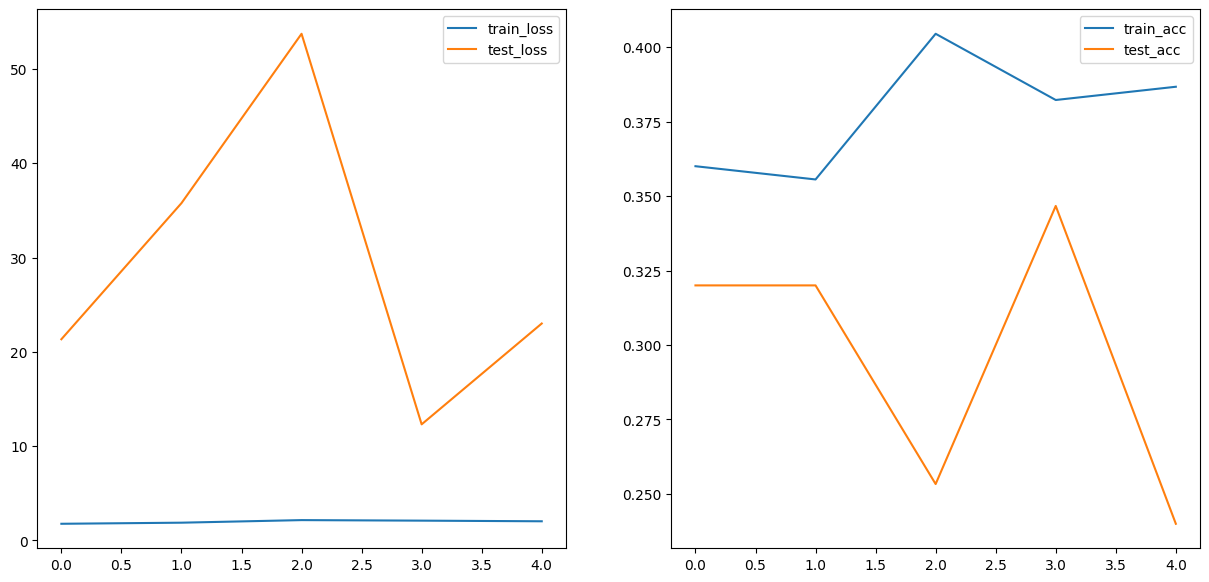

In [26]:

plot_loss_curves(results)

In [45]:
from PIL import Image

def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str],
                        image_size:Tuple[int, int],
                        transform:torchvision.transforms=None,
                        device:torch.device=device):
    img=Image.open(image_path)
    
    if transform is not None:
        image_transform=transform
    else:
        image_transform=transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])
        
    model.to(device)
    
    model.eval()
    with torch.inference_mode():
        transformed_image=image_transform(img).unsqueeze(dim=0)
        
        target_image_pred=model(transformed_image.to(device))
        
    target_image_pred_probs=torch.softmax(target_image_pred,dim=1)
    
    target_image_pred_label=torch.argmax(target_image_pred_probs,dim=1)
    
    plt.figure()
    plt.imshow(img)
    plt.title(f"pred: {class_names[target_image_pred_label]} | prob: {target_image_pred_probs.max()}")
    plt.axis(False);
    


In [46]:
class_names=["pizza","sneak","sushi"]

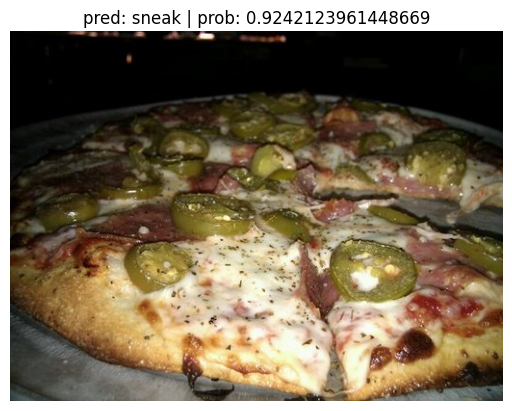

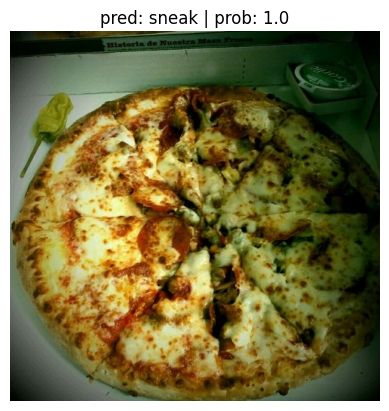

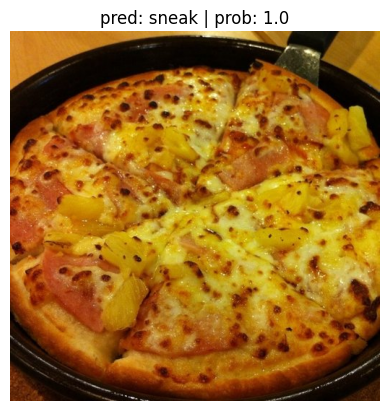

In [47]:
# get a random list of image paths from test set
import random
num_images_to_plot=3

test_image_path_list=list(Path(test_dir).glob("*/*.jpg"))
test_image_path_simple=random.sample(population=test_image_path_list,
                                     k=num_images_to_plot)

for image_path in test_image_path_list:
    if num_images_to_plot>0:
        pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224,224))
        num_images_to_plot=num_images_to_plot-1

exists


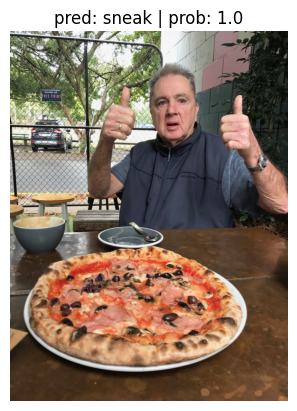

In [48]:
import requests

custom_image_path=data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
    with open(custom_image_path,"wb") as f:
        request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        f.write(request.content)
        
    
else:
    print("exists")
    
    
pred_and_plot_image(model=model,
                     image_path=custom_image_path,
                     class_names=class_names,
                     image_size=(224,224))

Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. Check out 03. PyTorch Computer Vision section 10 for ideas.

Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
- Predicting across all of the test dataset, storing the labels and predicted probabilities.
- Sort the predictions by wrong prediction and then descending predicted probabilities, this will give you the wrong predictions with the highest prediction probabilities, in other words, the "most wrong".
- Plot the top 5 "most wrong" images, why do you think the model got these wrong?

Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?

Train the model from section 4 above for longer (10 epochs should do), what happens to the performance?

Train the model from section 4 above with more data, say 20% of the images from Food101 of Pizza, Steak and Sushi images.
- You can find the 20% Pizza, Steak, Sushi dataset on the course GitHub. It was created with the notebook extras/04_custom_data_creation.ipynb.

Try a different model from torchvision.models on the Pizza, Steak, Sushi data, how does this model perform?
- You'll have to change the size of the classifier layer to suit our problem.
- You may want to try an EfficientNet with a higher number than our B0, perhaps torchvision.models.efficientnet_b2()?